In [19]:
from pinns import *
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [27]:
    

# Initialize the model with specified parameters and apply weights
model = MLP(input_size=2, output_size=1, hidden_layers=1, hidden_units=10, activation_function=nn.Tanh())
model.apply(init_weights)

MLP(
  (linear_in): Linear(in_features=2, out_features=10, bias=True)
  (linear_out): Linear(in_features=10, out_features=1, bias=True)
  (layers): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
  )
  (act): Tanh()
)

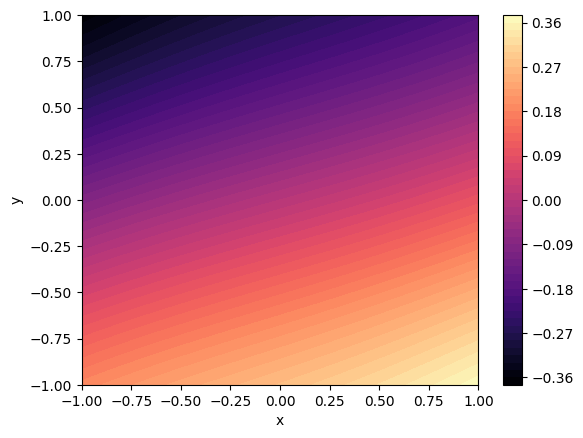

In [41]:
# Set model to evaluation mode
model.eval()

# Generate a grid of x and y values from 0 to 1
n_points = 101  # resolution of the grid
x = np.linspace(-1, 1, n_points)
y = np.linspace(-1, 1, n_points)
X, Y = np.meshgrid(x, y)

# Flatten and stack grid points into (N, 2) input tensor
inputs = np.stack([X.ravel(), Y.ravel()], axis=1)
inputs_tensor = torch.tensor(inputs, dtype=torch.float32)

# Get the output from the model
with torch.no_grad():
    outputs = model(inputs_tensor)

# Select only the first output component
output_single = outputs[:, 0].numpy().reshape(n_points, n_points)

# Optional: visualize
plt.contourf(X, Y, output_single, levels=50, cmap='magma')
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


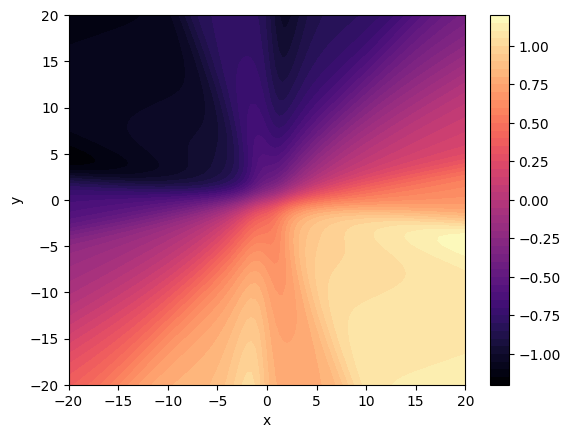

In [38]:
# Set model to evaluation mode
model.eval()

# Generate a grid of x and y values from 0 to 1
n_points = 101  # resolution of the grid
x = np.linspace(-20, 20, n_points)
y = np.linspace(-20, 20, n_points)
X, Y = np.meshgrid(x, y)

# Flatten and stack grid points into (N, 2) input tensor
inputs = np.stack([X.ravel(), Y.ravel()], axis=1)
inputs_tensor = torch.tensor(inputs, dtype=torch.float32)

# Get the output from the model
with torch.no_grad():
    outputs = model(inputs_tensor)

# Select only the first output component
output_single = outputs[:, 0].numpy().reshape(n_points, n_points)

# Optional: visualize
plt.contourf(X, Y, output_single, levels=50, cmap='magma')
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


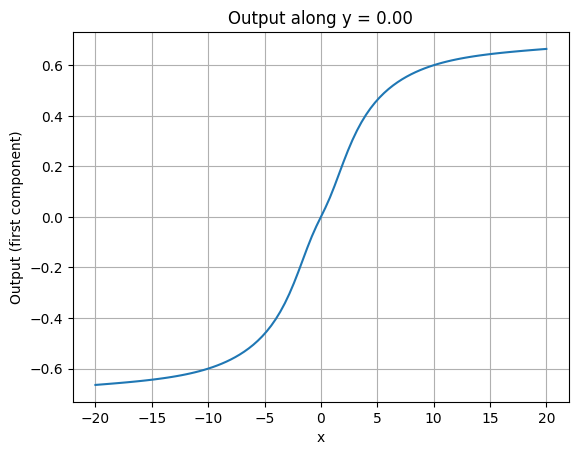

In [40]:
# Choose the row index you want (e.g., the middle one)
row_index = n_points // 2   # middle row

# Get corresponding x values and output values along that row
x_row = x
output_row = output_single[row_index, :]  # shape: (n_points,)

# Plot the output as a function of x (with y fixed)
plt.plot(x_row, output_row)
plt.title(f"Output along y = {y[row_index]:.2f}")
plt.xlabel("x")
plt.ylabel("Output (first component)")
plt.grid(True)
plt.show()
